In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
from scipy import stats


csv_file = "oasis_longitudinal.csv"
mri_data = pd.read_csv(csv_file)
mri_data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [2]:
mri_data['Group'] = mri_data['Group'].replace(['Converted'],['Demented'])
mri_data.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
mri_dropna = mri_data.dropna(how = 'any')
mri_dropna.count()


Subject ID    354
MRI ID        354
Group         354
Visit         354
MR Delay      354
M/F           354
Hand          354
Age           354
EDUC          354
SES           354
MMSE          354
CDR           354
eTIV          354
nWBV          354
ASF           354
dtype: int64

In [4]:
mri_dropdups_first = mri_dropna.drop_duplicates(['Subject ID'], keep = 'first')
mri_dropdups_first.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [5]:
# mri_grouped_data = mri_data.set_index(['Subject ID','MRI ID'])
# mri_grouped_data.head(10)
mri_dropdups_last = mri_dropna.drop_duplicates(['Subject ID'], keep = 'last')
mri_dropdups_last.head()



,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
16,OAS2_0009,OAS2_0009_MR2,Demented,2,576,M,R,69,12,2.0,24.0,0.5,1480,0.791,1.186


In [6]:
gender_based = mri_dropdups_last.groupby(['M/F']).count()['Subject ID']
gender_based

M/F
F    84
M    58
Name: Subject ID, dtype: int64

<BarContainer object of 2 artists>

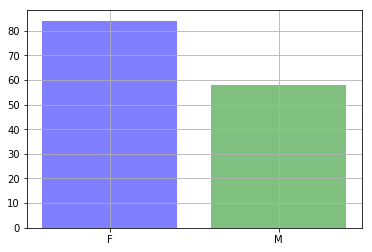

In [7]:
x_axis = gender_based.index
plt.grid()
plt.bar(x_axis, gender_based, alpha=0.5, align="center", color = ['b','g'])

In [8]:
group_based = mri_dropdups_last.groupby(['Group']).count()['Subject ID']
group_based

Group
Demented       70
Nondemented    72
Name: Subject ID, dtype: int64

<BarContainer object of 2 artists>

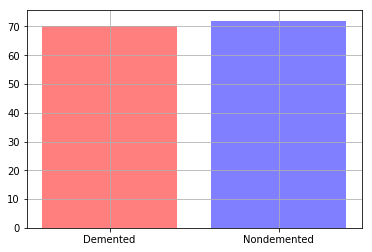

In [9]:
x_axis = group_based.index
plt.grid()
plt.bar(x_axis, group_based, alpha=0.5, align="center", color = ['r','b'])

In [10]:
bins = [60,66,71,76,81,86,91,100]
age_cat = ['60-65','66-70','71-75','76-80','81-85','86-90','91+']

In [11]:
mri_dropdups_last['Age Category'] = pd.cut(mri_dropdups_last['Age'],bins = bins, labels = age_cat, include_lowest = True)
mri_dropdups_last.set_index(['Age Category']).head()


/Users/madhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Age Category,,,,,,,,,,,,,,,
86-90,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
86-90,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
81-85,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
91+,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
66-70,OAS2_0009,OAS2_0009_MR2,Demented,2,576,M,R,69,12,2.0,24.0,0.5,1480,0.791,1.186


In [12]:
age_based = mri_dropdups_last.groupby(['Age Category']).count()['Subject ID']
age_based.sum()

142

<BarContainer object of 7 artists>

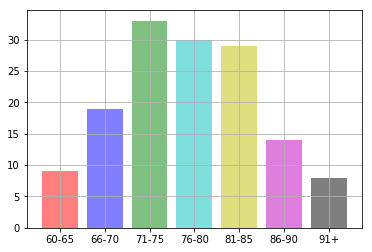

In [13]:
x_axis = age_based.index
plt.grid()
plt.bar(x_axis, age_based, alpha=0.5, align="center", color = ['r','b','g','c','y','m','k'])

In [14]:
mri_age_group = mri_dropdups_last.groupby(['Age Category','Group']).count()['Subject ID'].unstack()
mri_age_group

Group,Demented,Nondemented
Age Category,,
60-65,3,6
66-70,12,7
71-75,18,15
76-80,14,16
81-85,13,16
86-90,7,7
91+,3,5


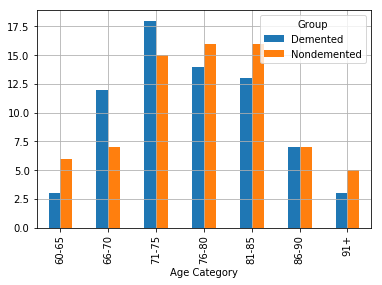

In [15]:

mri_age_group.plot(kind = 'bar', stacked = False, grid = True)

In [30]:
cdr_gender = mri_dropdups_last.groupby(['CDR','M/F']).count()['Subject ID'].unstack()

cdr_gender.dropna(how = 'any')

M/F,F,M
CDR,,
0.0,51,22
0.5,23,26
1.0,8,9
2.0,2,1


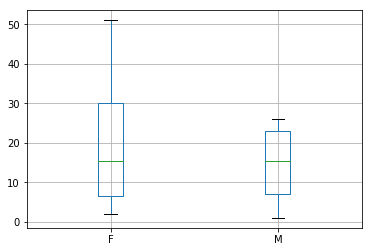

In [31]:
# CDR Vs Gender shows Men have higher chance of Dementia
# x_axis = cdr_group.index
# female = cdr_group['F']
# male = cdr_group['M']

cdr_gender.boxplot()
# f_line, = plt.plot(x_axis, female, color="red", label="Female")
# m_line, = plt.plot(x_axis, male, color="blue", label="Male")


In [34]:
cdr_group = mri_dropdups_last.groupby(['CDR','Group']).count()['Subject ID'].unstack()
cdr_group.fillna(0)

Group,Demented,Nondemented
CDR,,
0.0,1.0,72.0
0.5,49.0,0.0
1.0,17.0,0.0
2.0,3.0,0.0


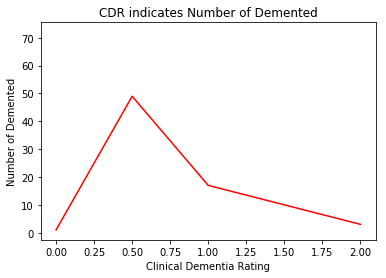

In [43]:
x_axis = cdr_group.index
demented = cdr_group['Demented']
nondemented = cdr_group['Nondemented']

demented_line, = plt.plot(x_axis, demented, color="red", label="Demented")
nondemented_line, = plt.plot(x_axis, nondemented, color="blue", label="Nondemented")
plt.title("CDR indicates Number of Demented")
plt.xlabel("Clinical Dementia Rating")
plt.ylabel("Number of Demented")

plt.show()

In [18]:
# merged = mri_dropdups_first[['Subject ID','Group','Age','MMSE','CDR','eTIV','nWBV']].merge(mri_dropdups_last[['Subject ID',
#                             'Group','Age','MMSE','CDR','eTIV','nWBV']], 
#                             on = 'Subject ID', how = 'left',suffixes=('_first', '_last'))
                            
# merged.head()

In [28]:
#MMSE Vs Group to identify signs of Dementia, NonDemented have higher scores
MMSE_based = mri_dropdups_last.groupby(['MMSE','Group']).count()['Subject ID'].unstack()
MMSE_based.fillna(0)

Group,Demented,Nondemented
MMSE,,
4.0,1.0,0.0
15.0,1.0,0.0
16.0,2.0,0.0
17.0,4.0,0.0
18.0,2.0,0.0
20.0,3.0,0.0
21.0,5.0,0.0
22.0,4.0,0.0
23.0,2.0,0.0


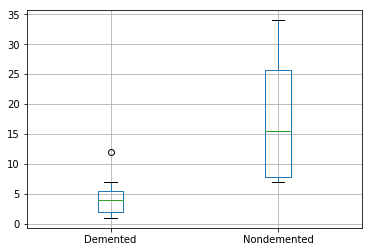

In [29]:
MMSE_based.boxplot()

In [ ]:
#line chart 
education_grouped = mri_dropdups_last.groupby(['EDUC']).count()['Subject ID']
education_grouped.plot(kind = 'line', grid=True)

In [ ]:
#SES vs EDUC
SES_EDUC_DF = pd.DataFrame(latest_visit_df[['Age', 'nWBV']])
#SES_EDUC_DF = SES_EDUC_DF.set_index('EDUC')
SES_EDUC_DF = SES_EDUC_DF.reset_index()
#SES_EDUC_DF
#SES_EDUC_DF.plot.scatter(x='Age',y='nWBV')

(slope, intercept, _, _, _) = linregress(latest_visit_df['Age'], latest_visit_df['nWBV'])
fit = slope * latest_visit_df['Age'] + intercept
#print(fit)
fig, ax = plt.subplots()
ax.plot(latest_visit_df['Age'], latest_visit_df['nWBV'], linewidth=0, marker='o')
ax.plot(latest_visit_df['Age'], fit, 'b--')

plt.show()